# Bike Shared Assignment

## Step 1: Reading and Understanding The Data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Loading data from data file to dataframe
data = pd.read_csv('day.csv')

# Checking the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [117]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


***There is not any null data found

In [118]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 3: Data Preparation

The "instant" column is merely an index for each record in the dataset and contains no meaningful information related to bike demand. Removing this column will not affect the model or data analysis

In [119]:
drop_columns = ['instant', 'dteday']

column 'cnt' count of total rental bikes including both casual and registered then we can drop 'casual' and 'registered' as they are not needed

In [120]:
drop_columns.extend(['casual', 'registered'])
print(drop_columns)
# data.drop(drop_columns, axis=1, inplace=True)
data.drop(columns=drop_columns, inplace=True)

['instant', 'dteday', 'casual', 'registered']


In [121]:
# Step 2: Preprocessing the Data
# Convert categorical columns to meaningful labels
data["season"] = data["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
data["weathersit"] = data["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
data["yr"] = data["yr"].map({0: "2018", 1: "2019"})

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=["season", "weathersit", "yr", "mnth", "weekday"], drop_first=True)

## Step 2: Visualising the Data

### Visualising Numeric Variables
Making a pairplot of all the numberic variable

In [122]:
# sns.pairplot(data)
# plt.show()

In [123]:
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,True,False,False,False


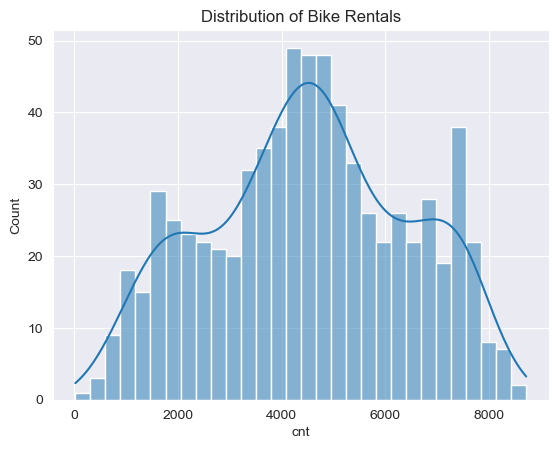

In [124]:

sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

In [125]:
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,True,False,False,False


The data is approximately normal.

In [126]:
# Count plots for categorical variables
categorical_vars = ["season", "mnth", "weathersit", "workingday"]
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=data)
    plt.title(f"Count Plot of {var}")
    plt.show()



ValueError: Could not interpret value `season` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['temp', 'atemp', 'hum', 'windspeed']])
plt.title("Boxplot of Continuous Variables")
plt.show()

In [ ]:
sns.pairplot(data, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

In [ ]:
# Get the dummy variables for the feature 'season'

season_dummies = pd.get_dummies(data['season'], drop_first=True).astype(int)
season_dummies.head()

In [ ]:
# Add the results to the original dataframe
data = pd.concat([data, season_dummies], axis=1)
# Drop the 'season' column from the dataframe
data.drop(["season"], axis=1, inplace=True)
data.head()

In [ ]:

weathersit_dummies = pd.get_dummies(data["weathersit"], drop_first=True).astype(int)
weathersit_dummies.head()

There is no 'Heavy Rain/Snow' data record found.

In [ ]:
# Add the results to the original dataframe
data = pd.concat([data, weathersit_dummies], axis=1)
# Drop the 'weathersit' column from the dataframe
data.drop(["weathersit"], axis=1, inplace=True)
data.head()

Since 'yr' is binary, you can skip the dummy encoding and keep it as 0/1 without mapping to "2018" and "2019"

In [ ]:
# # Step 3: Exploratory Data Analysis (EDA)
# sns.pairplot(data)
# plt.show()

In [ ]:
# Drop colum 'dteday'
data.drop(columns=['dteday'], inplace=True)
data.head()

## Splitting the Data into Trainning and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

## Rescaling the Feature

In [ ]:
data.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_variables = ['temp', 'atemp', 'hum', 'windspeed']

In [ ]:
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#
# # Step 1: Reading and Understanding the Data
# # Load the dataset
# # df = pd.read_csv('your_dataset.csv')  # Uncomment and specify the file path if needed
#
# # Sample dataset structure based on provided info
# df = pd.read_csv('day.csv')
#
# # Drop unnecessary columns if they exist
# df = df.drop(columns=["casual", "registered"], errors="ignore")
#
# # Step 2: Preprocessing the Data
# # Convert categorical columns to meaningful labels
# df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
# df["weathersit"] = df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
# df["yr"] = df["yr"].map({0: "2018", 1: "2019"})
#
# # Convert categorical variables into dummy variables
# df = pd.get_dummies(df, drop_first=True)
#
# # Step 3: Exploratory Data Analysis (EDA)
# sns.pairplot(df)
# plt.show()
#
# # Step 4: Train-Test Split
# X = df.drop(columns=["cnt"])
# y = df["cnt"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Step 5: Rescaling the Features
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#
# # Step 6: Feature Selection using P-value and VIF
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled_df = sm.add_constant(X_train_scaled_df)
# model = sm.OLS(y_train, X_train_scaled_df).fit()
# print(model.summary())
#
# # Remove variables with P-value > 0.05 iteratively
# while True:
#     p_values = model.pvalues
#     max_p = p_values.idxmax()
#     if p_values[max_p] > 0.05:
#         X_train_scaled_df = X_train_scaled_df.drop(columns=[max_p])
#         model = sm.OLS(y_train, X_train_scaled_df).fit()
#     else:
#         break
#
# # Check for multicollinearity using VIF
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train_scaled_df.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]
# print(vif_data)
#
# # Drop variables with VIF > 5 iteratively
# while True:
#     max_vif = vif_data[vif_data["VIF"] > 5]
#     if not max_vif.empty:
#         drop_col = max_vif.sort_values(by="VIF", ascending=False).iloc[0]["feature"]
#         X_train_scaled_df = X_train_scaled_df.drop(columns=[drop_col])
#         vif_data = pd.DataFrame()
#         vif_data["feature"] = X_train_scaled_df.columns
#         vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])]
#     else:
#         break
#
# # Step 7: Build Final Model
# model_final = sm.OLS(y_train, X_train_scaled_df).fit()
# print(model_final.summary())
#
# # Step 8: Evaluation
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# X_test_scaled_df = sm.add_constant(X_test_scaled_df)
# y_pred = model_final.predict(X_test_scaled_df[X_train_scaled_df.columns])
#
# # Model evaluation
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
#
# print(f"R-squared Score: {r2}")
# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")
